<a href="https://colab.research.google.com/github/ProfTodoMundo/DeepLearningReview/blob/main/Implement_Machine_Learning_Steps_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Steps to build a machine learning model:

1. Loading the dataset
2. Understanding the dataset
3. Data preprocessing
4. Data visualization
5. Building a regression model
6. Model evaluation
7. Model prediction1



1. Loading the dataset



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
root_dir = os.path.abspath('/content/drive/MyDrive/VsatDatasets/')
print(root_dir)

/content/drive/MyDrive/VsatDatasets


In [ ]:
import pandas as pd
data = pd.read_csv(os.path.join(root_dir, 'Insurance', 'insurance.csv'))

data.head()

# Body Mass Index (BMI) is a measurement: BMI=weight(kg)/height^{2}(m^{2}
# It is used by insurance companies to estimate a person's risk of health issues and
# Use to determine their insurance premium.


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


2. Understanding The Dataset


In [ ]:
# see the number of rows and columns of the dataset
data.shape


(1338, 7)

In [ ]:
# info method to get more information about the dataset.
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# There is no missing data in the dataset.
# You can also use the isnull method to see the missing data.
data.isnull()


,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [ ]:
# use the sum method to see the sum of the missing data.
data.isnull().sum()
# there is no missing data in the dataset

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
# Knowing the column types is very important for building a machine learning model.
# Look at the column types.
data.dtypes


,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
# alternative way for checking nulls
data.isna().apply(pd.value_counts)

<ipython-input-172-4708db511f2b>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  data.isna().apply(pd.value_counts)


,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


3. Data Preprocessing


In [ ]:
# convert object types to category types.
data['sex'] = data['sex'].astype('category')
data['region'] = data['region'].astype('category')
data['smoker'] = data['smoker'].astype('category')

In [ ]:
# see the data types again.
data.dtypes


,0
age,int64
sex,category
bmi,float64
children,int64
smoker,category
region,category
charges,float64


In [ ]:
# take a look at the statistics of numeric variables with the describe method.
# If we use the transpose of the dataset, you can see the statistics better.

data.describe().T


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# Cleaned dataset

In [ ]:
# clean your data by removing duplicate values, and
# transforming columns into numerical values to make them easier to work with.
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
label.fit(data.sex.drop_duplicates())
data.sex= label.transform(data.sex)

#smoker or not
label.fit(data.smoker.drop_duplicates())
data.smoker = label.transform(data.smoker)

#region
label.fit(data.region.drop_duplicates())
data.region = label.transform(data.region)
data

#OR
#data["sex"] = data['sex'].str.replace(',', '').astype(float) - if ',' is the problem
#data["sex"] = data['sex'].str.replace(' ', '').astype(float) - if blank space is the problem
#df["Numbers"] = [float(str(i).replace(",", "")) for i in df["Numbers"]]

#data['sex'] = data['sex'].map({'male': 0, 'female': 1}).astype(float)
#data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1}).astype(float)
#data['region'] = data['region'].map({'southwest': 0, 'southeast': 1}).astype(float)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,2,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


In [ ]:
# look at the mean charges for smokers and non-smokers.
# To do this, let’s first group with the groupby method.
# Let us use the round method to see only two numbers after the comma.

# smoke_data = data.groupby("smoker").mean().round(2)

smoke_data = data.groupby("smoker").mean().round(2)


In [ ]:
# see smoke data
# smokers pay more than non-smokers.
smoke_data

,age,sex,bmi,children,region,charges
smoker,,,,,,
0,39.39,0.51,30.65,1.09,1.24,8434.27
1,38.51,0.42,30.71,1.11,1.24,32050.23


4. Data Visualization

In [ ]:
# look at the relationships of numeric variables using the seaborn.
import seaborn as sns

# Seaborn is a library that it builds on the matplotlib, especially used for statistical plots.

sns.set_style("whitegrid")  # choose the plot style.


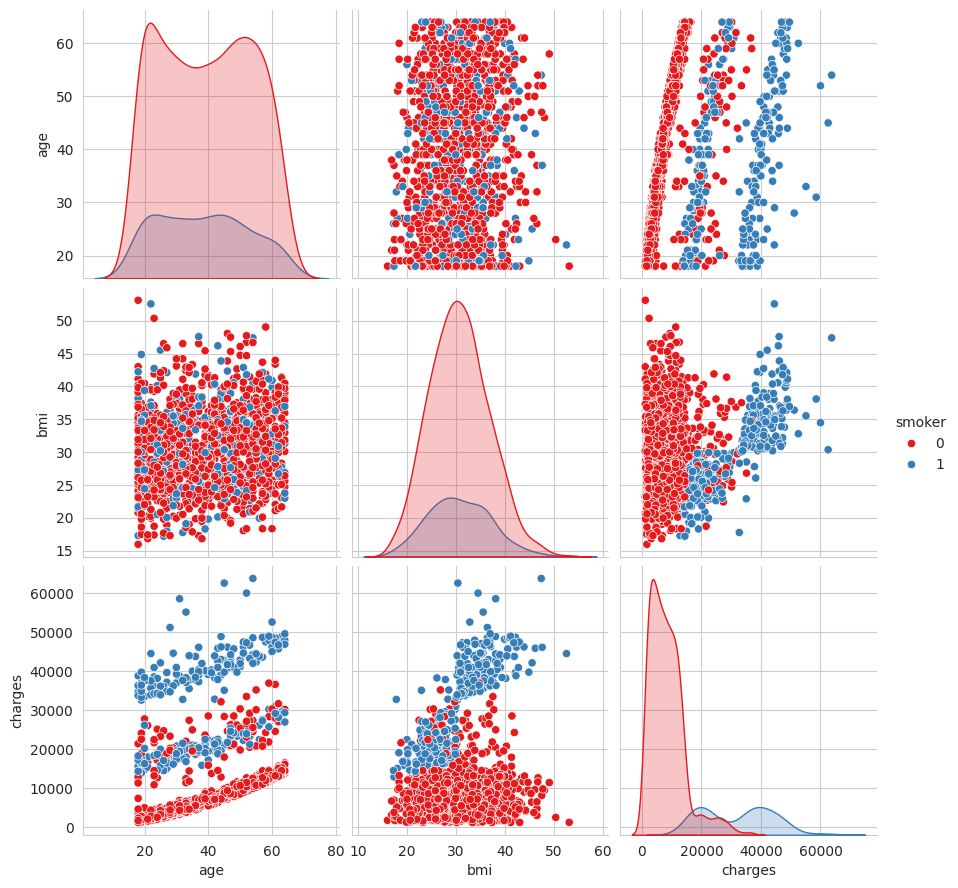

In [ ]:
# use the pairplot method to see the relationships of numeric variables.

sns.pairplot(
    data[["age", "bmi", "charges", "smoker"]],
    hue = "smoker",
    height = 3,
    palette = "Set1")

<Axes: >

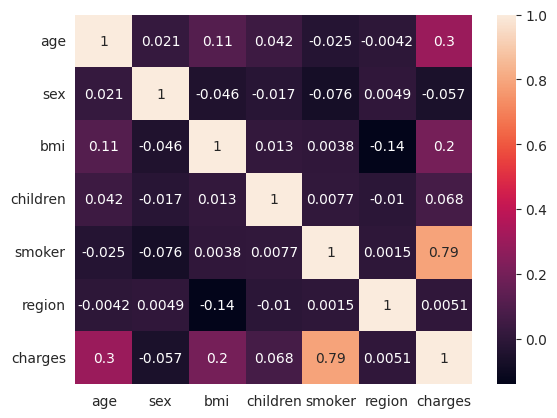

In [ ]:
# when the age variable increases, both smokers and non-smokers pay more.
# Now, let’s look at the correlation between the variables.

sns.heatmap(data.corr(), annot= True)

# Notice that there is a relationship between charges and the other variables.


In [ ]:
# convert categorical data to one-hot encoding.
# do a one-hot encoding of the categorical variables in the dataset.
# Automatically convert categorical data into one-hot encoding using the get_dummies method in Pandas.

data = pd.get_dummies(data)


In [ ]:
# only categorical data were converted to one-hot encoding. Now let’s look at the columns of the dataset.

data.columns

# new columns have been created for each subcategory. Using Pandas was very easy.
# Thus, the dataset is ready to build the model.


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

5. Building a Regression Model


1. Build a simple model and then try more complex models for good accuracy.
2. Let us build linear regression model because the output variable charges is numeric type.

Building a machine learning model
1. Before building a machine learning model, we need to determine the input and output variables.
2. The input variables are features.
3. In statistics, these are called independent variables.
4. The output variable is the target variable.
5. In statistics, this variable is called the dependent variable.


In [ ]:
# Let’s assign the target variable charges to variable y.
y = data["charges"]


In [ ]:
# If we drop the target variable, the remainders are the features.

X = data.drop("charges", axis = 1)


In [ ]:
# Before the model is built, the dataset is split into training and testing.
# The model is built with the training data, and the model is evaluated with the test data.
# You can use the train_test_split method in scikit-learn to split the dataset into training and testing.
# With this method, you can easily split the dataset. First, let’s import this method.

from sklearn.model_selection import train_test_split


In [ ]:
# Let’s split the dataset into 80 percent training and 20 percent testing.
# If you don’t set random_state to any number, every time you run your code again, it will generate a different test set.
# It doesn't matter if the random_state is 0 or 1 or any other integer.
# It has seen random_state=42 used in many official examples of scikit.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state = 1)

# OR
# X = data.drop(['charges'], axis =1)
# y = data[['charges']]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

In [ ]:
# Now, let’s build the model.
# Let me import the linear regression class from scikit-learn.

from sklearn.linear_model import LinearRegression


In [ ]:
# Let me create an instance of the LinearRegression class.

lr = LinearRegression()


In [ ]:
# Build the model using the training data.

lr.fit(X_train,y_train)

# Our model was built.

LinearRegression()

6. Model Evaluation

In [ ]:
# Look at the performance of the model.
# To do this, use the coefficient of determination.
# The closer this value is to 1, the better the model.
# First, look at the score of the model on the test data.

#lr.score(X_test, y_test).round(3)
lr.score(X_test, y_test)


0.7621765433328571

In [ ]:
# The coefficient of determination on the test data is greater than 0.7.
# Our model is not bad.
# Of course, it would be better if it was closer to 1.
# See the score of the model on the training data.

lr.score(X_train, y_train)

# Observations:
 # 1. The performance of the model on the training data is close to the performance of the test data.
 # 2. If the performance of the model on the training data was high, it would mean that there is an overfitting problem.
 # 3. How to solve the overfitting problem?
 # 4. To overcome the overfitting problem, you can use regularization.
 # 5. Ridge or lasso models can be used for this.

0.7473485947823262

In [ ]:
# Take a look at another metric, mean squared error, to evaluate the model.
# For this, first predict the test data with the predict method.

y_pred = lr.predict(X_test)
y_pred

array([[ 4433.22405768],
       [12990.16735974],
       [12371.93519841],
       [13591.76975375],
       [  441.0004809 ],
       [32162.87768715],
       [13219.00431702],
       [12051.69719945],
       [ 3526.16221298],
       [29841.71604931],
       [11423.51915844],
       [17235.15482669],
       [ 9021.79413626],
       [ 8195.62628739],
       [ 3442.27302079],
       [10285.79790952],
       [ 4034.36347974],
       [ 6797.59182552],
       [15322.87739024],
       [14262.32648834],
       [12234.87737673],
       [33214.07718188],
       [ 9204.05737686],
       [ 8861.18200196],
       [ 2722.2304247 ],
       [ 8288.65040392],
       [ 9292.57545579],
       [11079.55608495],
       [ 7500.55329321],
       [ 4121.95592082],
       [13934.73054813],
       [ 5672.63879117],
       [34395.67454788],
       [27072.00628976],
       [33730.02179212],
       [ 9699.93068368],
       [30189.61539334],
       [26494.32261839],
       [15448.78566246],
       [33982.90855577],


In [ ]:
# Now, import the mean_squared_error metric.
from sklearn.metrics import mean_squared_error

# Will use this metric now.


In [ ]:
# First, import the math module to calculate the square root of this metric.
import math


In [ ]:
# Look at the square root of the mean squares error.

math.sqrt(mean_squared_error(y_test, y_pred))

# This value means that the model predicts with a standard deviation of 5956.45.


5958.392209780193

7. Model Prediction

In [ ]:
# Now, will predict the first row as an example.
# First, let’s select the first row of the training data.

data_new = X_train[:1]


In [ ]:
# Let us predict the data with our model.

lr.predict(data_new)


array([[10653.66757767]])

In [ ]:
# Look at the real value.

y_train[:1]

# As you can see, our model predicted close to the real value.

,charges
216,10355.641


Conclusions

1. Above is an application using a real-world dataset.
2. Observe that it is very easy to build a machine learning model with Python libraries.

In [ ]:
# Let us oberse our Model Parameters.
# It shows the hyperparameters which affect the various variables in our dataset.

for idx, col_name in enumerate(X_train.columns):
	print("The coefficient for {} is {}".format(col_name, lr.coef_[0][idx]))

The coefficient for age is 258.0227851280726
The coefficient for sex is 240.63830381555815
The coefficient for bmi is 312.76253955039317
The coefficient for children is 407.3581677199334
The coefficient for smoker is 23767.85499985535
The coefficient for region is 388.8894582535707


In [ ]:
intercept = lr.intercept_[0]
intercept

-12359.440806484661